In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set
bank = pd.read_csv("/content/bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
#Shape of the data set
bank.shape

(45211, 18)

In [11]:
# Removing NA values in data set
bank = bank.dropna()
bank.shape


(45211, 18)

In [12]:
bank['output']=(bank.y=='yes').astype('int')

In [13]:
bank.head


<bound method NDFrame.head of        age           job   marital  education  ... previous  poutcome    y output
0       58    management   married   tertiary  ...        0   unknown   no      0
1       44    technician    single  secondary  ...        0   unknown   no      0
2       33  entrepreneur   married  secondary  ...        0   unknown   no      0
3       47   blue-collar   married    unknown  ...        0   unknown   no      0
4       33       unknown    single    unknown  ...        0   unknown   no      0
...    ...           ...       ...        ...  ...      ...       ...  ...    ...
45206   51    technician   married   tertiary  ...        0   unknown  yes      1
45207   71       retired  divorced    primary  ...        0   unknown  yes      1
45208   72       retired   married  secondary  ...        3   success  yes      1
45209   57   blue-collar   married  secondary  ...        0   unknown   no      0
45210   37  entrepreneur   married  secondary  ...       11     othe

In [14]:
#numeric data
cols_num=['age','balance','duration','day','campaign','pdays']

In [15]:
bank[cols_num].isnull().sum

<bound method DataFrame.sum of          age  balance  duration    day  campaign  pdays
0      False    False     False  False     False  False
1      False    False     False  False     False  False
2      False    False     False  False     False  False
3      False    False     False  False     False  False
4      False    False     False  False     False  False
...      ...      ...       ...    ...       ...    ...
45206  False    False     False  False     False  False
45207  False    False     False  False     False  False
45208  False    False     False  False     False  False
45209  False    False     False  False     False  False
45210  False    False     False  False     False  False

[45211 rows x 6 columns]>

In [16]:
#categorical data
cols_cat=['job','marital','education','default','housing','contact','month','poutcome']

In [17]:
#creating dummy variable
bank[cols_cat]
cols_new_cat=pd.get_dummies(bank[cols_cat],drop_first=True)
cols_new_cat.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [18]:
bank=pd.concat([bank,cols_new_cat],axis=1)

In [19]:
colls_all_cat=list(cols_new_cat.columns)

In [20]:
cols_input=cols_num+colls_all_cat
bank_data=bank[cols_input+['output']]

In [21]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,output,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [22]:
bank_data[bank_data.duplicated()].shape

(0, 41)

In [23]:
bank_data[bank_data.duplicated()]

,age,balance,duration,day,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,output


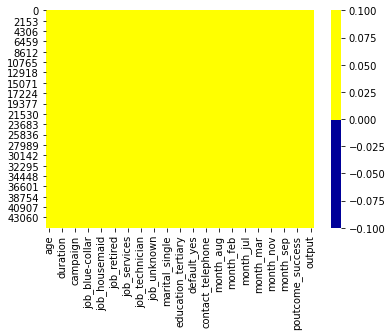

In [26]:
#missing value imputation
import seaborn as sns
cols = bank_data.columns
colours = ['#000099','#ffff00']
sns.heatmap(bank_data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
bank_data[bank_data.isnull().any(axis=1)].head

<bound method NDFrame.head of Empty DataFrame
Columns: [age, balance, duration, day, campaign, pdays, job_blue-collar, job_entrepreneur, job_housemaid, job_management, job_retired, job_self-employed, job_services, job_student, job_technician, job_unemployed, job_unknown, marital_married, marital_single, education_secondary, education_tertiary, education_unknown, default_yes, housing_yes, contact_telephone, contact_unknown, month_aug, month_dec, month_feb, month_jan, month_jul, month_jun, month_mar, month_may, month_nov, month_oct, month_sep, poutcome_other, poutcome_success, poutcome_unknown, output]
Index: []>

In [ ]:
bank_data.isnull().sum()

age                    0
balance                0
duration               0
day                    0
campaign               0
pdays                  0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0


In [ ]:
bank_data.shape

(45211, 41)

In [ ]:
bank_data=bank_data.drop(["age","day","marital_married","month_may"],axis = 1)

In [ ]:
bank_data

,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,output
0,2143,261,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,29,151,1,-1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,76,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1506,92,1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,198,1,-1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
45207,1729,456,2,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
45208,5715,1127,5,184,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
45209,668,508,4,-1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
x = bank_data.iloc[:,:35]
Y = bank_data.iloc[:,36]

In [ ]:
#logestic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predict for X dataset
y_pred = classifier.predict(x)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(x)})

In [ ]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39095   827]
 [ 3756  1533]]


In [ ]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [ ]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

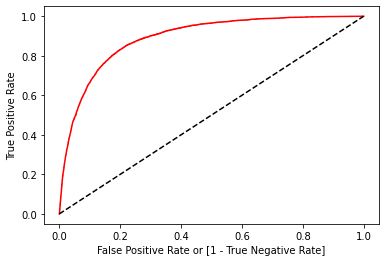

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [ ]:
auc

0.6345657284683011